In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from source import source
from parameters import default_parameters, test_parameters

In [3]:
import import_ipynb
from utils import fast_fourier_transform, inverse_fast_fourier_transform
from mod import MQAM_constellation, symbols_to_signal_mapping
from Channel import Channel

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from mod.ipynb
importing Jupyter notebook from Channel.ipynb


In [24]:
def generate_data(cst,n,p, B ):
    # Time mesh
    T = 30000
    N = 2**11 #*1e9
    dt = T/N # 1/dt > 2*B
    t = np.arange(-T/2,T/2,dt)
    assert(len(t) == N) # sanity check
    
    nb = n*int(np.log2(cst.m))
    _, b = source(nb,p)
    _, complex_symb_seq = qam_16_cst.bit_to_symb(b)
    x_0, _ = symbols_to_signal_mapping(t, complex_symb_seq ,B)
    
    noise_sigma_pow_2 = 0.00000001
    
    z = 100   
    nz = 100*z
    
    x_z = Channel.generate(t, x_0, z, nz, noise_sigma_pow_2)
    
    x_0_f = fast_fourier_transform(x_0)
    x_0_f = np.fft.fftshift(np.fft.fft(x_0))
    x_z_f = fast_fourier_transform(x_0)
    x_z_f = np.fft.fftshift(np.fft.fft(x_z))
    
    plt.plot(np.abs(x_0))
    plt.plot(np.abs(x_z))
    plt.legend(['input signal', 'output signal'])
    plt.title('signals in Time domaine')
    plt.show()
    plt.plot(np.abs(x_0_f))
    #plt.plot(np.abs(x_z_f))
    plt.legend(['input signal', 'output signal'])
    plt.title('signals in Freq domaine')
    plt.show()
    

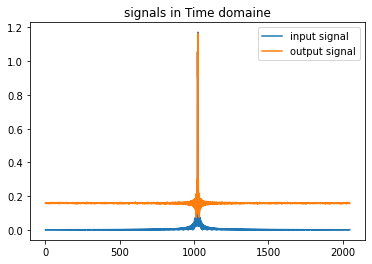

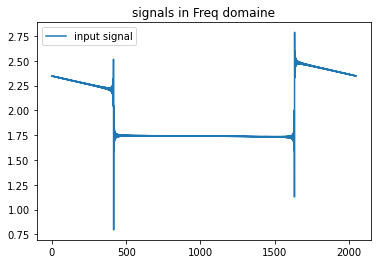

In [25]:
if __name__ == '__main__':
    M=16
    n = 5
    Pp = 6e-3
    norm_Pp = Pp/default_parameters['P_0']['value']
    qam_16_cst = MQAM_constellation(M) 
    _ = qam_16_cst.norm_complex_constellation
    _ = qam_16_cst.get_constellation(norm_Pp)
    B = test_parameters['B']['value']
    generate_data(qam_16_cst,n, p=0.5, B=B )